In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from regression import LinearRegression, PolynomailRegression

In [23]:
data = pd.read_csv("data/temperature.csv")

### Visualize the graph relating the pressure to the temperature.

In [3]:
x, y = data[['temperature']].values, data['pressure'].values
x = MinMaxScaler().fit_transform(x)

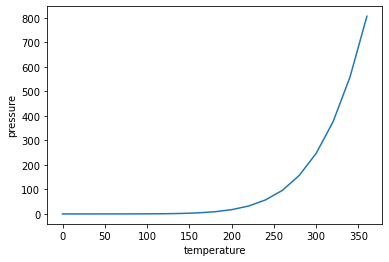

In [4]:
plt.plot(data["temperature"],data["pressure"])
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.show()

### What can you notice from the graph?

We can notice from the graph that the relation between **Pressure** and **Temperature** doesn't follow a **linear** trend.

### Use linear regression to capture the relationship between inputs and outputs of the data. Then, return the empirical error 𝐿𝑆(ℎ𝑟𝑒𝑔).


In [5]:
L = LinearRegression()
losses = L.fit(x,y)

the empirical error of Linear Regression is : 25468.027830688377


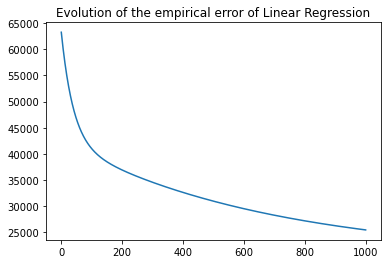

In [6]:
print(f"the empirical error of Linear Regression is : {losses[-1]}")

plt.title("Evolution of the empirical error of Linear Regression")
plt.plot(losses)
plt.show()

### Visualize linear model in the constructed graph.

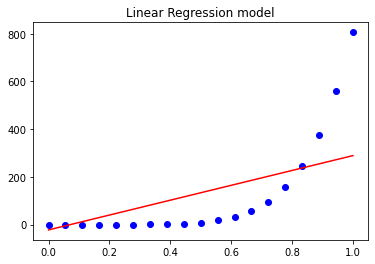

In [7]:
plt.title("Linear Regression model")
plt.scatter(x,y,c='b')
plt.plot(x,L.predict(x),c='red')
plt.show()

### Comment your result.


After plotting the regression line, we can see that it underfits our data points as they was no linear relationship in the first place.

### Fit the data with polynomial regression model. Try different orders (𝑄 = 2, 3, 4), and in each time compute the empirical error. 

the empirical error of order 2 regression is : 1.304556462855544e-11


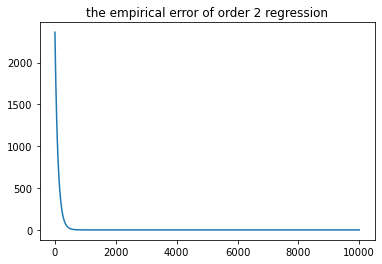

In [8]:
model_2 = PolynomailRegression(degree = 2, learning_rate = 0.01)
model_2.fit(x,y)

print(f"the empirical error of order 2 regression is : {model_2.errors[-1]}")
plt.title("the empirical error of order 2 regression")
plt.plot(model_2.errors)
plt.show()

the empirical error of order 3 regression is : 1.2249756764504127e-11


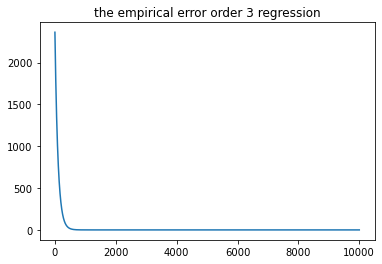

In [9]:
model_3 = PolynomailRegression(degree = 3, learning_rate = 0.01)
model_3.fit(x, y)

print(f"the empirical error of order 3 regression is : {model_3.errors[-1]}")
plt.title("the empirical error order 3 regression")
plt.plot(model_3.errors)
plt.show()

the empirical error order 4 regression is : 1.2647660696529783e-11


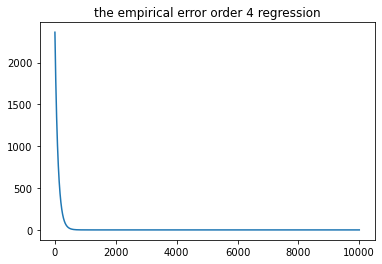

In [10]:
model_4 = PolynomailRegression(degree = 4, learning_rate = 0.01)
model_4.fit(x,y)

print(f"the empirical error order 4 regression is : {model_4.errors[-1]}")
plt.title("the empirical error order 4 regression")
plt.plot(model_4.errors)
plt.show()

### Draw the different polynomial regression models in the same graph. What do you notice?

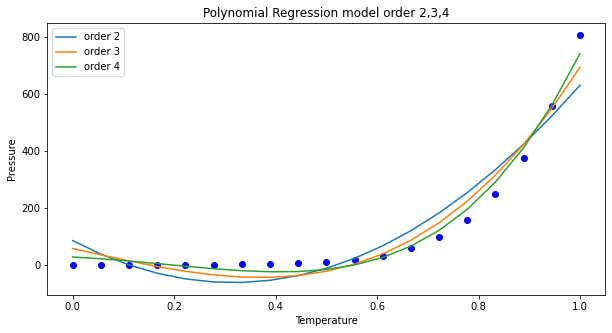

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,color="blue")

plt.plot(x, model_2.predict(x), label="order 2")
plt.plot(x, model_3.predict(x), label="order 3")
plt.plot(x, model_4.predict(x), label="order 4")
plt.title("Polynomial Regression model order 2,3,4")
plt.xlabel("Temperature")
plt.ylabel("Pressure")


plt.legend()
plt.show()

We notice that as the order of polynomial regression increases the quality of the fitted models also gets better.

### Compare the result of the best polynomial regression model with the linear regression model. What is the best model?

the best polynomial regression model is the one with **the 4th degree** since we see from the plot above that it fits the data better than other models

### For the best model, let’s run it using these learning rates from 0.1 to 1. For each case give:
* The number of iterations.
* The empirical error.

In [20]:
e = 0.0000001
err = 1
iters = [i for i in range(100, 1000, 100)]
lrs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
errors = []
max_iters = []
for lr in lrs:
    for iterr in iters:
        best_model = PolynomailRegression(degree = 4, learning_rate = lr, iterations = iterr)
        best_model.fit(x, y)
        err = best_model.errors[-1]
        if err < e :
            errors.append(err)
            max_iters.append(iterr)
            break 

df = pd.DataFrame({'learning rate' : lrs,
                   'emperical errors' : errors,
                   'max iterations' : max_iters,})

In [21]:
df

,learning rate,emperical errors,max iterations
0,0.1,4.968115e-11,300
1,0.2,1.989520e-13,200
2,0.3,1.193712e-12,100
3,0.4,-1.563194e-13,100
4,0.5,-8.526513e-14,100
5,0.6,-3.125000e-02,100
6,0.7,-0.000000e+00,100
7,0.8,-1.152922e+18,100
8,0.9,-7.737125e+25,100
9,1.0,-0.000000e+00,100
